## DATASETS DESCRIPTION

Movie Metadata: Contains metadata for movies, including information such as movie ID, movie name, release date, box office revenue, runtime, languages, countries, and genres.

Character Metadata: Contains metadata for characters aligned with movies, including information such as movie ID, character name, actor details (date of birth, gender, height, ethnicity, age at movie release), and Freebase IDs.

IMDb Data: Provides comprehensive information about movies, including their ID, name, release year, certificate, runtime, genre, rating, director, stars, votes, and gross box office.

Oscar Data: Contains all nominations for the Academy Awards (Oscars), including information about the film, ceremony, category, nominee, and whether the nominee was a winner.

Blockbusters: Contains information about blockbuster movies, including their genres, IMDb ratings, lengths, ranks in a particular year, ratings, studios, worldwide gross earnings, and the year of release.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_path = 'MovieData/'

# Load the data
movie_metadata = pd.read_csv(data_path + 'movie.metadata.tsv', sep='\t', header=None)
movie_metadata.columns = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres']

character_metadata = pd.read_csv(data_path + 'character.metadata.tsv', sep='\t', header=None)
character_metadata.columns = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date', 'Character name', 'Actor date of birth', 'Actor Gender', 'Actor height', 'Actor Ethnicity', 'Actor name', 'Actor age at movie release', 'Freebase character/actor map ID', 'Freebase character ID', 'Freebase actor ID']

oscar_data = pd.read_csv(data_path + 'the_oscar_award.csv', sep=',')

blockbusters = pd.read_csv(data_path + 'blockbusters.csv', sep=',')

# the imdb data is stored in multiple files, with each file named as <main_genre>.csv, where <main_genre> is the main genre of the movies in the file

genres = ['action', 'adventure', 'animation', 'biography', 'crime', 'family', 'fantasy', 'film-noir', 'history', 'horror', 'mystery', 'romance', 'scifi', 'sports', 'thriller', 'war']

imdb_data = {}

for genre in genres:
    imdb_data[genre] = pd.read_csv(data_path + 'imdb/' + genre + '.csv', sep=',')

### Exploratory Data Analysis

Getting a rough idea of the data by checking the first few rows, data types, and basic statistics. Checking for missing values, duplicates, and creating plots to visualize the data.

In [2]:
movie_metadata.head()

Wikipedia movie ID Freebase movie ID  \
0              975900         /m/03vyhn   
1             3196793         /m/08yl5d   
2            28463795        /m/0crgdbh   
3             9363483        /m/0285_cd   
4              261236         /m/01mrr1   

                                          Movie name Movie release date  \
0                                     Ghosts of Mars         2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey ...         2000-02-16   
2                                        Brun bitter               1988   
3                                   White Of The Eye               1987   
4                                  A Woman in Flames               1983   

   Movie box office revenue  Movie runtime  \
0                14010832.0           98.0   
1                       NaN           95.0   
2                       NaN           83.0   
3                       NaN          110.0   
4                       NaN          106.0   

                      Movie languages  \
0  {"/m/02h40lc": "English Language"}   
1  {"/m/02h40lc": "English Language"}   
2  {"/m/05f_3": "Norwegian Language"}   
3  {"/m/02h40lc": "English Language"}   
4   {"/m/04306rv": "German Language"}   

                             Movie countries  \
0  {"/m/09c7w0": "United States of America"}   
1  {"/m/09c7w0": "United States of America"}   
2                     {"/m/05b4w": "Norway"}   
3             {"/m/07ssc": "United Kingdom"}   
4                    {"/m/0345h": "Germany"}   

                                        Movie genres  
0  {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  
1  {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biograp...  
2  {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "D...  
3  {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic...  
4                            {"/m/07s9rl0": "Drama"}

In [3]:
character_metadata.head()

Wikipedia movie ID Freebase movie ID Movie release date  \
0              975900         /m/03vyhn         2001-08-24   
1              975900         /m/03vyhn         2001-08-24   
2              975900         /m/03vyhn         2001-08-24   
3              975900         /m/03vyhn         2001-08-24   
4              975900         /m/03vyhn         2001-08-24   

               Character name Actor date of birth Actor Gender  Actor height  \
0                    Akooshay          1958-08-26            F         1.620   
1  Lieutenant Melanie Ballard          1974-08-15            F         1.780   
2         Desolation Williams          1969-06-15            M         1.727   
3          Sgt Jericho Butler          1967-09-12            M         1.750   
4             Bashira Kincaid          1977-09-25            F         1.650   

  Actor Ethnicity          Actor name  Actor age at movie release  \
0             NaN      Wanda De Jesus                        42.0   
1      /m/044038p  Natasha Henstridge                        27.0   
2         /m/0x67            Ice Cube                        32.0   
3             NaN       Jason Statham                        33.0   
4             NaN         Clea DuVall                        23.0   

  Freebase character/actor map ID Freebase character ID Freebase actor ID  
0                      /m/0bgchxw            /m/0bgcj3x        /m/03wcfv7  
1                       /m/0jys3m            /m/0bgchn4         /m/0346l4  
2                       /m/0jys3g            /m/0bgchn_        /m/01vw26l  
3                      /m/02vchl6            /m/0bgchnq         /m/034hyc  
4                      /m/02vbb3r            /m/0bgchp9         /m/01y9xg

In [4]:
movie_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wikipedia movie ID        81741 non-null  int64  
 1   Freebase movie ID         81741 non-null  object 
 2   Movie name                81741 non-null  object 
 3   Movie release date        74839 non-null  object 
 4   Movie box office revenue  8401 non-null   float64
 5   Movie runtime             61291 non-null  float64
 6   Movie languages           81741 non-null  object 
 7   Movie countries           81741 non-null  object 
 8   Movie genres              81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


In [51]:
character_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450669 entries, 0 to 450668
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Wikipedia movie ID               450669 non-null  int64  
 1   Freebase movie ID                450669 non-null  object 
 2   Movie release date               440674 non-null  object 
 3   Character name                   192794 non-null  object 
 4   Actor date of birth              344524 non-null  object 
 5   Actor Gender                     405060 non-null  object 
 6   Actor height                     154824 non-null  float64
 7   Actor Ethnicity                  106058 non-null  object 
 8   Actor name                       449441 non-null  object 
 9   Actor age at movie release       292556 non-null  float64
 10  Freebase character/actor map ID  450669 non-null  object 
 11  Freebase character ID            192804 non-null  object 
 12  Fr

In [5]:
movie_metadata.describe()

Wikipedia movie ID  Movie box office revenue  Movie runtime
count        8.174100e+04              8.401000e+03   6.129100e+04
mean         1.740784e+07              4.799363e+07   1.118192e+02
std          1.098791e+07              1.121753e+08   4.360070e+03
min          3.300000e+02              1.000000e+04   0.000000e+00
25%          7.323695e+06              2.083193e+06   8.100000e+01
50%          1.777899e+07              1.063969e+07   9.300000e+01
75%          2.715573e+07              4.071696e+07   1.060000e+02
max          3.750192e+07              2.782275e+09   1.079281e+06

In [6]:
# Check for missing values
movie_metadata.isnull().sum()

Wikipedia movie ID              0
Freebase movie ID               0
Movie name                      0
Movie release date           6902
Movie box office revenue    73340
Movie runtime               20450
Movie languages                 0
Movie countries                 0
Movie genres                    0
dtype: int64

In [54]:
character_metadata.isnull().sum()

Wikipedia movie ID                      0
Freebase movie ID                       0
Movie release date                   9995
Character name                     257875
Actor date of birth                106145
Actor Gender                        45609
Actor height                       295845
Actor Ethnicity                    344611
Actor name                           1228
Actor age at movie release         158113
Freebase character/actor map ID         0
Freebase character ID              257865
Freebase actor ID                     815
dtype: int64

In [7]:
# Check for duplicates
movie_metadata.duplicated().sum()

0

In [56]:
character_metadata.duplicated().sum()

0

# Inital Attempt to create plots from the data

Creating plots to visualize the data, such as the frequency of movies by release year, the mean age of an actor at release for each year, and the average runtime of movies by release year with error bars.

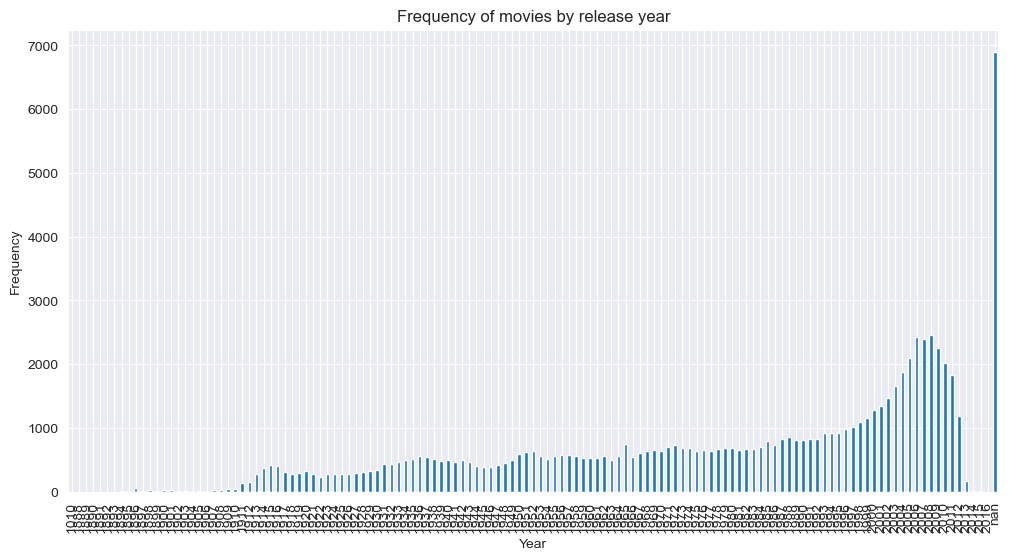

In [8]:
# Create plots from the data

# Plot the frequency of movies by released each year
plt.figure(figsize=(12, 6))
movie_metadata['Movie release date'].apply(lambda x: str(x).split('-')[0]).value_counts().sort_index().plot(kind='bar')
plt.title('Frequency of movies by release year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

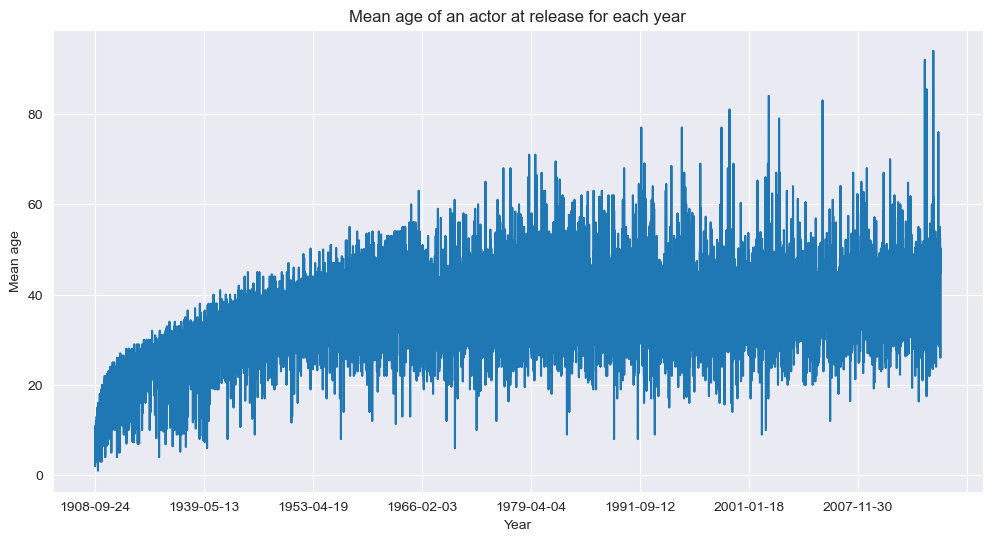

In [9]:
# Plot the mean age of an actor at release for each year using the 'Actor age at movie release' column in the character metadata

# Convert the 'Actor age at movie release' column to numeric
character_metadata['Actor age at movie release'] = pd.to_numeric(character_metadata['Actor age at movie release'], errors='coerce')

# Remove rows with missing values in the 'Actor age at movie release' column and negative values

character_metadata = character_metadata[(character_metadata['Actor age at movie release'] > 0) & (character_metadata['Actor age at movie release'] < 100)]

# create plot the mean age of an actor at release for each year
plt.figure(figsize=(12, 6))
character_metadata.groupby('Movie release date')['Actor age at movie release'].mean().plot()
plt.title('Mean age of an actor at release for each year')
plt.xlabel('Year')
plt.ylabel('Mean age')
plt.show()

<Figure size 1200x600 with 0 Axes>

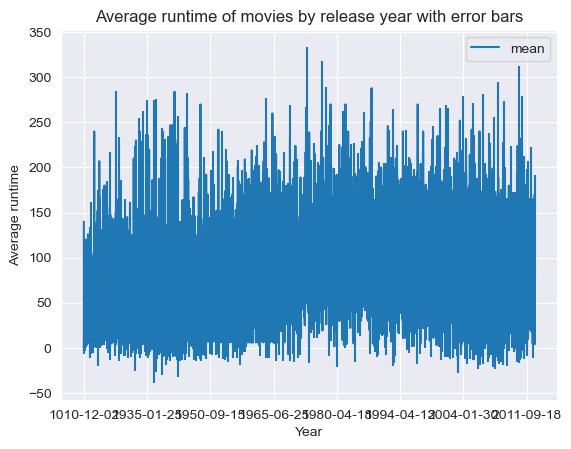

In [14]:
# Plot the average runtime of movies by release year with error bars

# Convert the 'Movie runtime' column to numeric
movie_metadata['Movie runtime'] = pd.to_numeric(movie_metadata['Movie runtime'], errors='coerce')

# Remove rows with missing values in the 'Movie runtime' column and negative values
movie_metadata = movie_metadata[(movie_metadata['Movie runtime'] > 0) & (movie_metadata['Movie runtime'] < 300)]

# Create a plot of the average runtime of movies by release year with error bars
plt.figure(figsize=(12,6))
movie_metadata.groupby('Movie release date')['Movie runtime'].agg(['mean', 'std']).plot(y='mean', yerr='std')

plt.title('Average runtime of movies by release year with error bars')
plt.xlabel('Year')
plt.ylabel('Average runtime')
plt.show()

# Moving to more advanced plotting techniques

Creating more advanced plots, such as joint plots and heatmaps to answer questions like:

- How does the box office revenue of movies relate to their runtime?
- What is the distribution of box office revenue for different genres and production studios?
- How have the average IMDb ratings for different genres changed over the years?

In [15]:
# The columns movie 'movie languages', 'movie countries', 'movie genre' are store in the following format: '{"/m/02h40lc": "English Language"}'. We will extract the language, country, and genre from these columns and update the dataframe.

# Extract the language, country, and genre from the columns
movie_metadata['Movie languages'] = movie_metadata['Movie languages'].apply(lambda x: list(eval(x).values()))
movie_metadata['Movie countries'] = movie_metadata['Movie countries'].apply(lambda
x: list(eval(x).values()))
movie_metadata['Movie genres'] = movie_metadata['Movie genres'].apply(lambda x: list(eval(x).values()))

In [16]:
# These columns have multiple values like [English Language, French Language] , so create 2 columns for Movie languages, and 3 columns for Movie genres to store their values

# Create columns for the movie languages
movie_metadata['Language 1'] = movie_metadata['Movie languages'].apply(lambda x: x[0] if len(x) > 0 else np.nan)

movie_metadata['Language 2'] = movie_metadata['Movie languages'].apply(lambda x: x[1] if len(x) > 1 else np.nan)

# Create columns for the movie genres

movie_metadata['Genre 1'] = movie_metadata['Movie genres'].apply(lambda x: x[0] if len(x) > 0 else np.nan)

movie_metadata['Genre 2'] = movie_metadata['Movie genres'].apply(lambda x: x[1] if len(x) > 1 else np.nan)

movie_metadata['Genre 3'] = movie_metadata['Movie genres'].apply(lambda x: x[2] if len(x) > 2 else np.nan)

# Create columns for the movie countries

movie_metadata['Country'] = movie_metadata['Movie countries'].apply(lambda x: x[0] if len(x) > 0 else np.nan)

# Drop the original columns
movie_metadata.drop(['Movie languages', 'Movie countries', 'Movie genres'], axis=1, inplace=True)


# Display the updated dataframe
movie_metadata.head()

Wikipedia movie ID Freebase movie ID  \
0              975900         /m/03vyhn   
1             3196793         /m/08yl5d   
2            28463795        /m/0crgdbh   
3             9363483        /m/0285_cd   
4              261236         /m/01mrr1   

                                          Movie name Movie release date  \
0                                     Ghosts of Mars         2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey ...         2000-02-16   
2                                        Brun bitter               1988   
3                                   White Of The Eye               1987   
4                                  A Woman in Flames               1983   

   Movie box office revenue  Movie runtime          Language 1 Language 2  \
0                14010832.0           98.0    English Language        NaN   
1                       NaN           95.0    English Language        NaN   
2                       NaN           83.0  Norwegian Language        NaN   
3                       NaN          110.0    English Language        NaN   
4                       NaN          106.0     German Language        NaN   

         Genre 1            Genre 2                 Genre 3  \
0       Thriller    Science Fiction                  Horror   
1        Mystery  Biographical film                   Drama   
2  Crime Fiction              Drama                     NaN   
3       Thriller    Erotic thriller  Psychological thriller   
4          Drama                NaN                     NaN   

                    Country  
0  United States of America  
1  United States of America  
2                    Norway  
3            United Kingdom  
4                   Germany

C:\Users\Dhruv\anaconda3\envs\pythonProject\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dhruv\anaconda3\envs\pythonProject\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

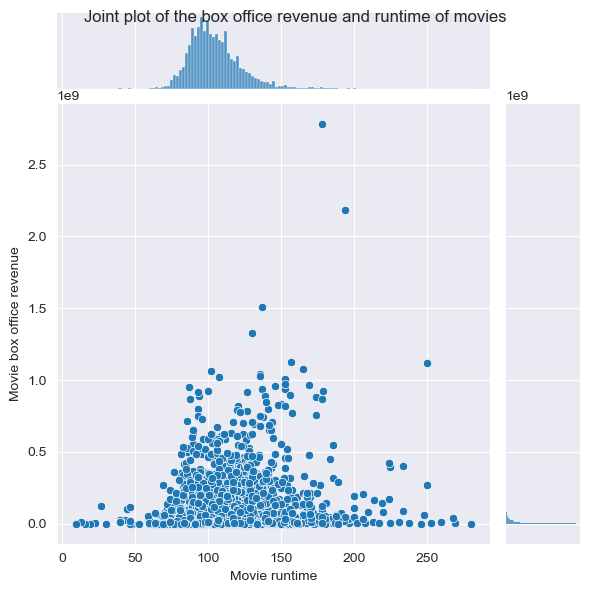

In [17]:
# Plot a joint-plot of the box office revenue and runtime of movies

# Convert the 'Movie box office revenue' column to numeric

movie_metadata['Movie box office revenue'] = pd.to_numeric(movie_metadata['Movie box office revenue'], errors='coerce')

# Remove rows with missing values in the 'Movie box office revenue' column

movie_metadata = movie_metadata[movie_metadata['Movie box office revenue'] > 0]

# Create a joint plot of the box office revenue and runtime of movies

plt.figure()
sns.jointplot(x='Movie runtime', y='Movie box office revenue', data=movie_metadata, kind='scatter')

plt.suptitle('Joint plot of the box office revenue and runtime of movies')
plt.show()

<Axes: xlabel='Main_Genre', ylabel='studio'>

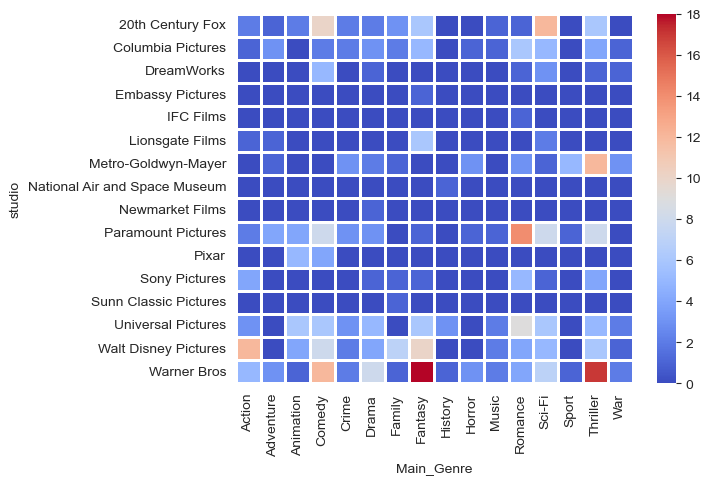

In [18]:
# Create a heatmap of the production studio and genre of movies with the average box office revenue as the value using the 'blockbusters' dataframe

stats_by_studio_genre = blockbusters.groupby(['studio', 'Main_Genre'])['worldwide_gross'].size().unstack().fillna(0)

sns.heatmap(stats_by_studio_genre, cmap='coolwarm', linecolor='white', linewidth=1)

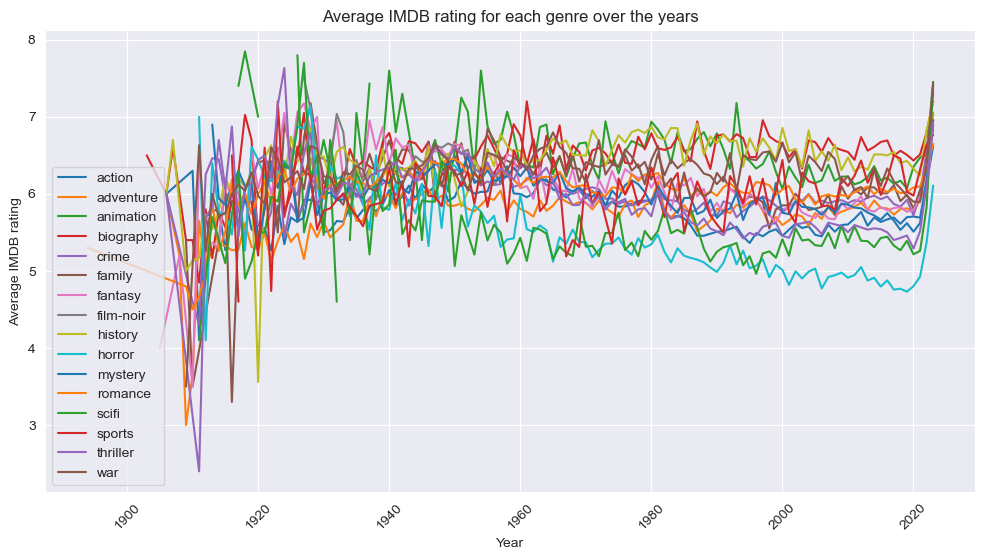

In [19]:
# Create a line plot showcasing the  average IMDB rating for each genre over the years with the rating on the y-axis and the year on the x-axis

# Space out the years and remove the nan values in the 'year' column

# Create a new column for the year of release using 'rating' (Eg: 6.9) and 'year' (Eg: 2023) columns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined `genres` and `imdb_data`

for genre in genres:
    imdb_data[genre]['year'] = imdb_data[genre]['year'].apply(lambda x: int(str(x)[:4]) if str(x)[:4].isdigit() else np.nan)


plt.figure(figsize=(12, 6))
for genre in genres:
    imdb_data[genre].groupby('year')['rating'].mean().plot(label=genre)

plt.title('Average IMDB rating for each genre over the years')
plt.xlabel('Year')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.ylabel('Average IMDB rating')
plt.legend()

plt.show()

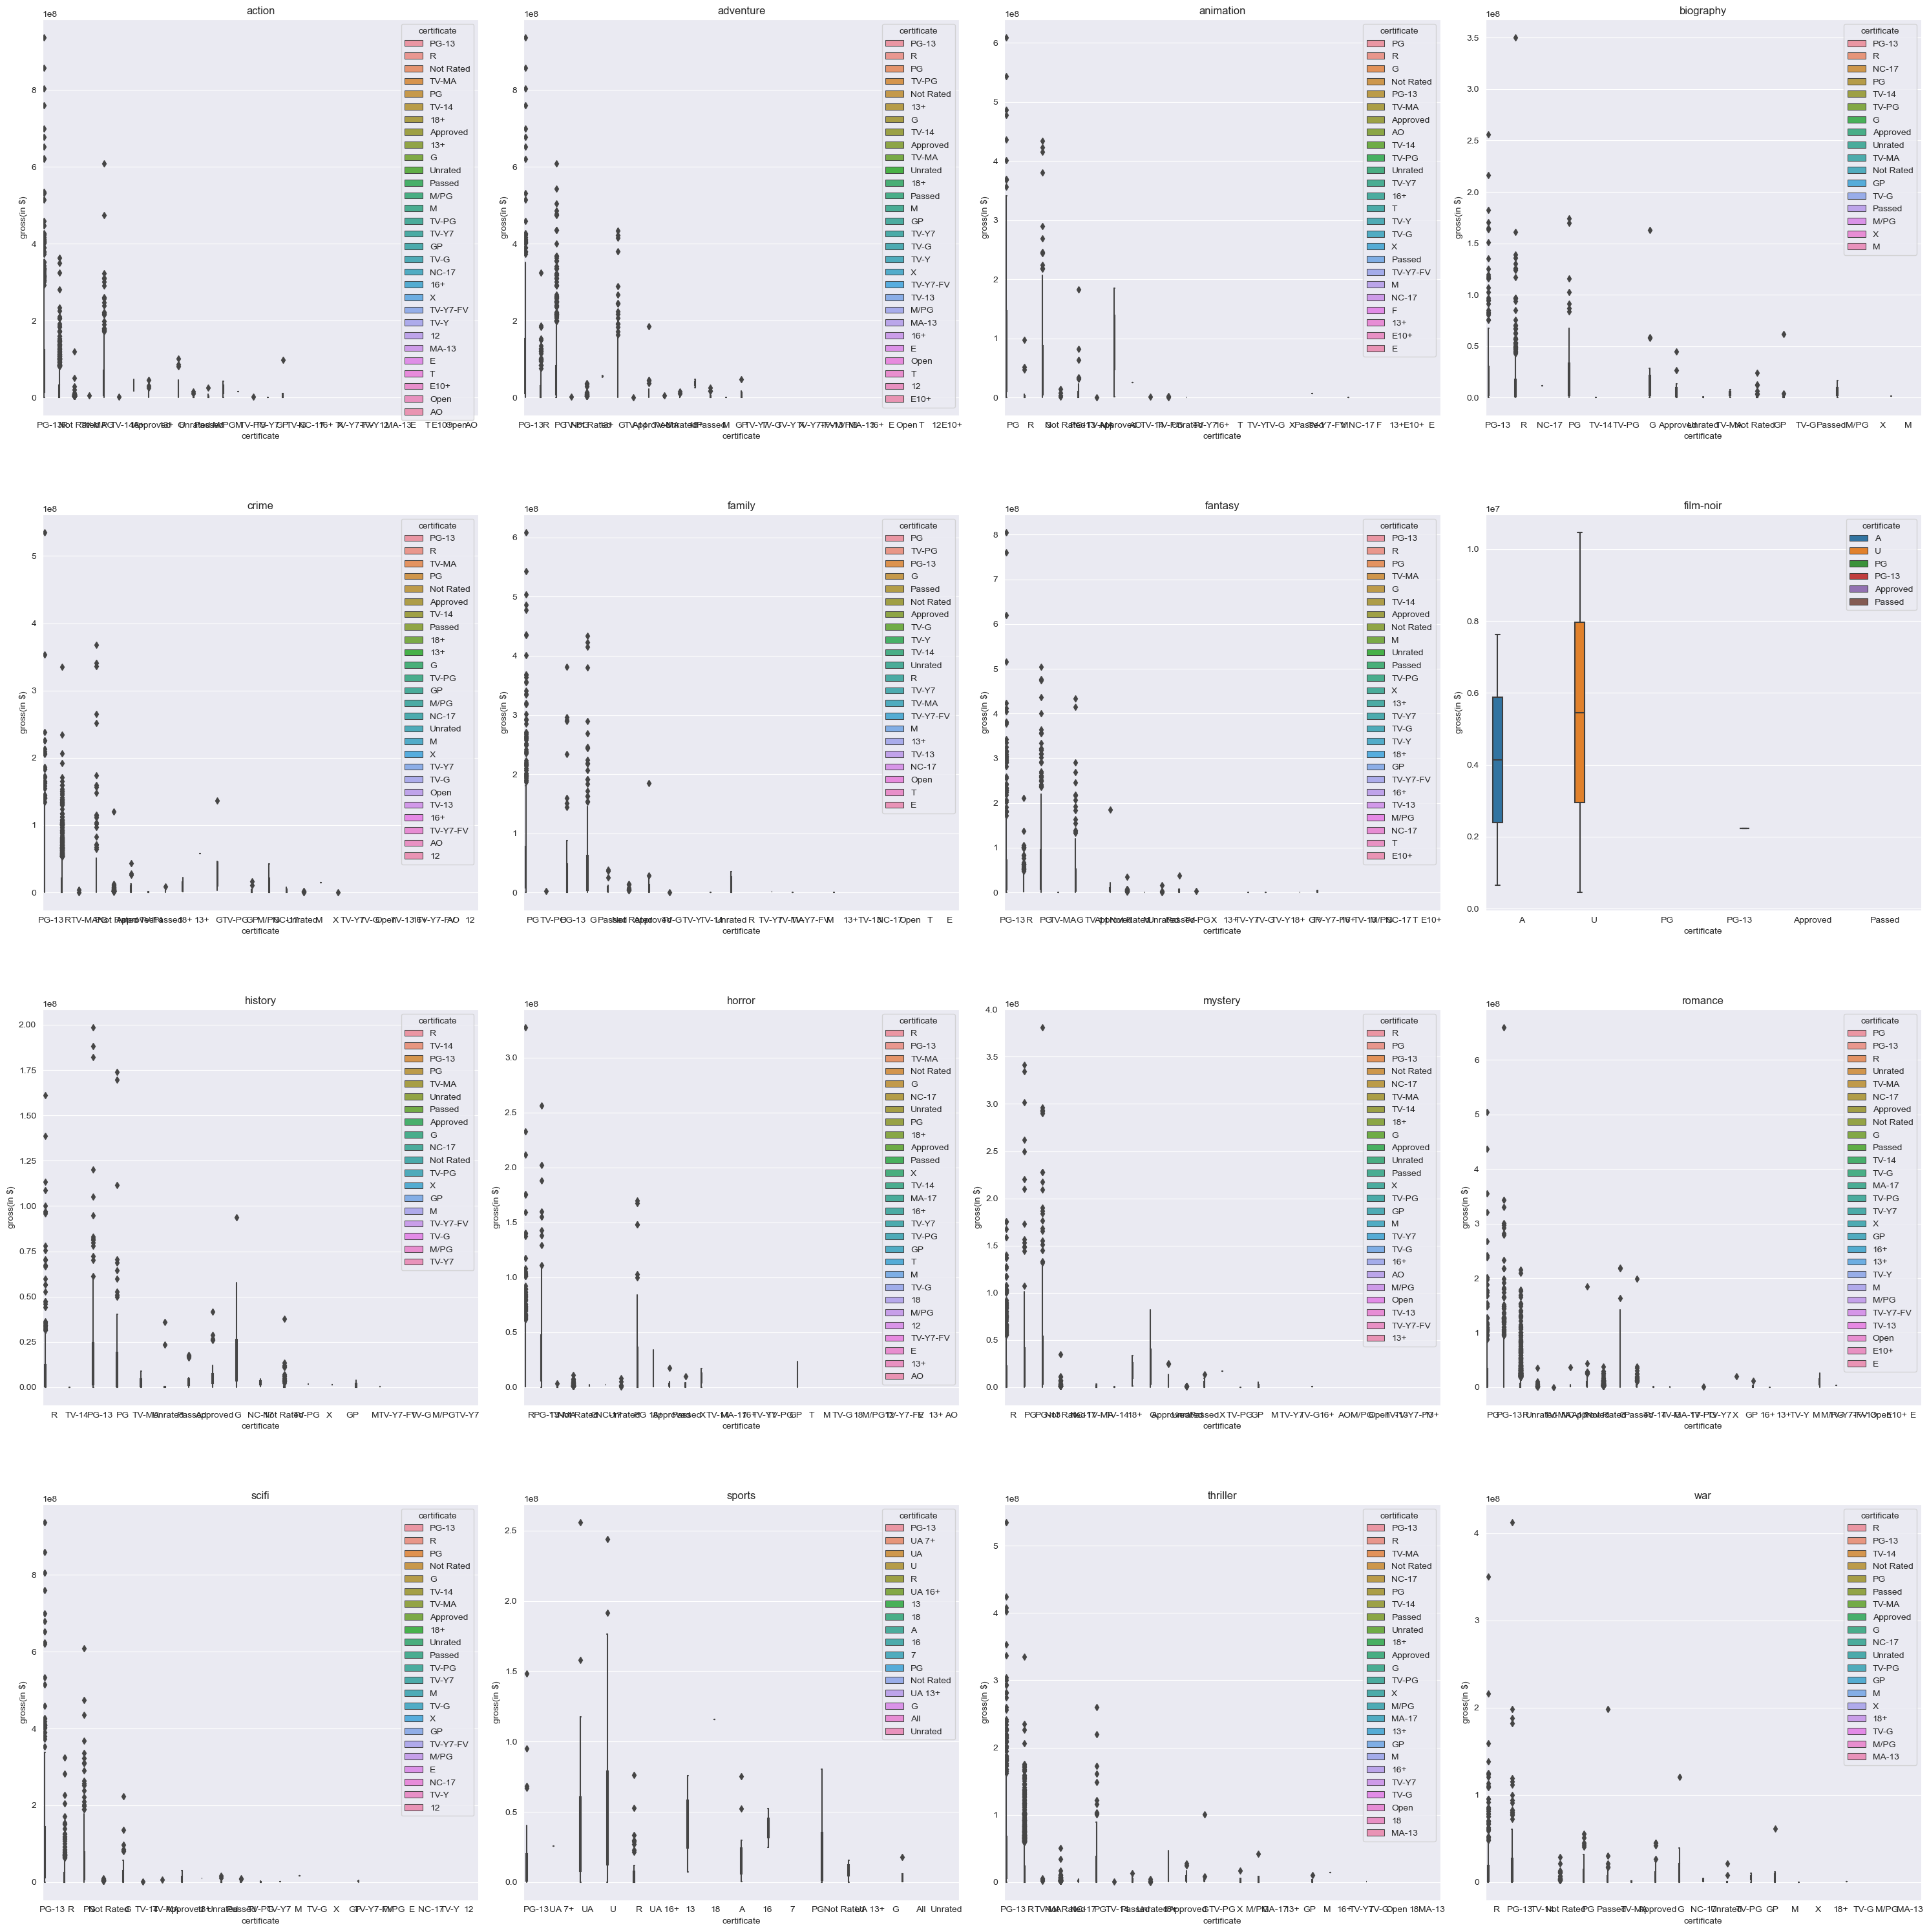

In [20]:
#Create a boxplot of certificate with respect of revenue as the hue for each genre using the 'imdb_data' dataframe, show them as subplots for each genre

# Convert the 'gross(in $)' column to numeric

for genre in genres:
    imdb_data[genre]['gross(in $)'] = pd.to_numeric(imdb_data[genre]['gross(in $)'], errors='coerce')
    

plt.figure(figsize=(30, 30))

for i, genre in enumerate(genres):
    # EACH pane with 2 subplots
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='certificate', y='gross(in $)', data=imdb_data[genre], hue='certificate')
    plt.title(genre)
    
plt.tight_layout()
plt.show()
    

In [ ]:
# From character_metadata, extract each unique actor and actress, their ethnicity(stored as Freebase ID), their year of birth and store them in a new dataframe

# Extract unique names
unique_names = character_metadata['Actor name'].unique()

# Create a new dataframe
actor_data = pd.DataFrame(unique_names, columns=['Actor name'])

# Extract the dob
actor_data['Year of birth'] = actor_data['Actor name'].apply(lambda x: character_metadata[character_metadata['Actor name'] == x]['Actor date of birth'].values[0])

# Extract the year from the date of birth
actor_data['Year of birth'] = actor_data['Year of birth'].apply(lambda x: int(str(x).split('-')[0]) if str(x).split('-')[0].isdigit() else np.nan)

# Extract the actor's ethnicity by interpreting the Freebase ID
actor_data

In [64]:
import requests

def get_ethnicity_from_wikidata(freebase_id):
    # Construct the URL for the Wikidata API query
    url = f"https://www.wikidata.org/w/api.php?action=wbgetentities&ids={freebase_id}&format=json"

    # Make the API request
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()

        # Extract ethnicity or other relevant information from the response
        # This part depends on how the information is structured in Wikidata
        # For simplicity, let's assume the ethnicity is stored as a label
        entity_data = data.get('entities', {}).get(freebase_id, {})
        labels = entity_data.get('labels', {})
        ethnicity_label = labels.get('en', {}).get('value')

        return ethnicity_label
    else:
        # Handle error cases
        return None

# Example usage
freebase_id = '/m/0jys3m'  # Replace this with your actual Freebase ID
ethnicity = get_ethnicity_from_wikidata(freebase_id)
print("Ethnicity:", ethnicity)


Ethnicity: None


Due to my inability to find any way to convert the freebase encodings for the character's ethnicity, I will not be able to complete the task. Thus, I stopped here and moved on to the next task and new potential dataset with no such issues.

Now, aiming to find some insight on the habits of actors and the way they are perceived by spectators, I found the TMDB (The Movie Database) 5000 Movie Dataset and to visualize my queries, I used the plotly library, which helped it make more interactive

The original dataset from which this kernel was built was originaly updated in September 2017 and Sohier Dane made a guide to adapt the old kernels to the new data structure.

The following function is written by Sophier, to parse the dataset.

In [21]:
import json


def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df
#____________________________
def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df
#_______________________________________
def safe_access(container, index_values):
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return np.nan
#_______________________________________
LOST_COLUMNS = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews']
#_______________________________________
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users'}
#_______________________________________     
IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}
#_______________________________________
def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])
#_______________________________________
def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])
#_______________________________________
def convert_to_original_format(movies, credits):
    tmdb_movies = movies.copy()
    tmdb_movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES, inplace=True)
    tmdb_movies['title_year'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.year)
    # I'm assuming that the first production country is equivalent, but have not been able to validate this
    tmdb_movies['country'] = tmdb_movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['language'] = tmdb_movies['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['director_name'] = credits['crew'].apply(get_director)
    tmdb_movies['actor_1_name'] = credits['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['actor_2_name'] = credits['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['actor_3_name'] = credits['cast'].apply(lambda x: safe_access(x, [3, 'name']))
    tmdb_movies['genres'] = tmdb_movies['genres'].apply(pipe_flatten_names)
    tmdb_movies['plot_keywords'] = tmdb_movies['plot_keywords'].apply(pipe_flatten_names)
    return tmdb_movies

In [22]:
import matplotlib.pyplot as plt
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go
import numpy as np
import pandas as pd
#_______________________________________________
credits = load_tmdb_credits("./MovieData/tmdb_5000_credits.csv")
movies = load_tmdb_movies("./MovieData/tmdb_5000_movies.csv")
df = convert_to_original_format(movies, credits)

df.head()

budget                                    genres  \
0  237000000  Action|Adventure|Fantasy|Science Fiction   
1  300000000                  Adventure|Fantasy|Action   
2  245000000                    Action|Adventure|Crime   
3  250000000               Action|Crime|Drama|Thriller   
4  260000000          Action|Adventure|Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                       plot_keywords  language  \
0  culture clash|future|space war|space colony|so...   English   
1  ocean|drug abuse|exotic island|east india trad...   English   
2  spy|based on novel|secret agent|sequel|mi6|bri...  Français   
3  dc comics|crime fighter|terrorist|secret ident...   English   
4  based on novel|mars|medallion|space travel|pri...   English   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ...  \
0  [{'name': 'Ingenious Film Partners', 'id': 289...  ...   
1  [{'name': 'Walt Disney Pictures', 'id': 2}, {'...  ...   
2  [{'name': 'Columbia Pictures', 'id': 5}, {'nam...  ...   
3  [{'name': 'Legendary Pictures', 'id': 923}, {'...  ...   
4        [{'name': 'Walt Disney Pictures', 'id': 2}]  ...   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                movie_title  vote_average  num_voted_users  \
0                                    Avatar           7.2            11800   
1  Pirates of the Caribbean: At World's End           6.9             4500   
2                                   Spectre           6.3             4466   
3                     The Dark Knight Rises           7.6             9106   
4                               John Carter           6.1             2124   

  title_year                   country      director_name     actor_1_name  \
0     2009.0  United States of America      James Cameron      Zoe Saldana   
1     2007.0  United States of America     Gore Verbinski    Orlando Bloom   
2     2015.0            United Kingdom         Sam Mendes  Christoph Waltz   
3     2012.0  United States of America  Christopher Nolan    Michael Caine   
4     2012.0  United States of America     Andrew Stanton     Lynn Collins   

       actor_2_name       actor_3_name  
0  Sigourney Weaver       Stephen Lang  
1   Keira Knightley  Stellan Skarsgård  
2       Léa Seydoux      Ralph Fiennes  
3       Gary Oldman      Anne Hathaway  
4   Samantha Morton       Willem Dafoe  

[5 rows x 26 columns]

In [23]:
# create a list of present genres
list_genres = set()
for s in df['genres'].str.split('|'):
    list_genres = set().union(s, list_genres)
list_genres = list(list_genres)
list_genres.remove('')   

Since there are 3 columns for actor present in the movie, i will be integrating it into 1 column to make things simpler as i move on to answer my first question :

1. What is the favorite genre of each actor/actress listed?

In [24]:
# integrate the 3 columns of actors under 1 column as 3 separate entries

df_actor1 = df[['actor_1_name', 'vote_average',
                 'title_year', 'movie_title']].reset_index(drop = True)

df_actor2 = df[['actor_2_name', 'vote_average',
                    'title_year', 'movie_title']].reset_index(drop = True) 

df_actor3 = df[['actor_3_name', 'vote_average',
                    'title_year', 'movie_title']].reset_index(drop = True)


# Add the df_actor2 and df_actor3 below as rows
df_actor1.columns = ['actor_name', 'vote_average', 'title_year', 'movie_title']
df_actor2.columns = ['actor_name', 'vote_average', 'title_year', 'movie_title']
df_actor3.columns = ['actor_name', 'vote_average', 'title_year', 'movie_title']

# Concatenate the DataFrames vertically
df_reduced = pd.concat([df_actor1, df_actor2, df_actor3], ignore_index=True)

for genre in list_genres:
    df_reduced[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)

# Drop actor rows where the name is missing
df_reduced = df_reduced.dropna(subset=['actor_name'])

df_reduced

actor_name  vote_average  title_year  \
0             Zoe Saldana           7.2      2009.0   
1           Orlando Bloom           6.9      2007.0   
2         Christoph Waltz           6.3      2015.0   
3           Michael Caine           7.6      2012.0   
4            Lynn Collins           6.1      2012.0   
...                   ...           ...         ...   
14404     Reinol Martinez           6.6      1992.0   
14405  Caitlin Fitzgerald           5.9      2011.0   
14406     Geoff Gustafson           7.0      2013.0   
14407           Alan Ruck           5.7      2012.0   
14408        Eric Roberts           6.3      2005.0   

                                    movie_title  War  Adventure  Thriller  \
0                                        Avatar  0.0        1.0       0.0   
1      Pirates of the Caribbean: At World's End  0.0        1.0       0.0   
2                                       Spectre  0.0        1.0       0.0   
3                         The Dark Knight Rises  0.0        0.0       1.0   
4                                   John Carter  0.0        1.0       0.0   
...                                         ...  ...        ...       ...   
14404                               El Mariachi  NaN        NaN       NaN   
14405                                 Newlyweds  NaN        NaN       NaN   
14406                 Signed, Sealed, Delivered  NaN        NaN       NaN   
14407                          Shanghai Calling  NaN        NaN       NaN   
14408                         My Date with Drew  NaN        NaN       NaN   

       Western  Action  Drama  ...  History  Romance  Foreign  Music  Mystery  \
0          0.0     1.0    0.0  ...      0.0      0.0      0.0    0.0      0.0   
1          0.0     1.0    0.0  ...      0.0      0.0      0.0    0.0      0.0   
2          0.0     1.0    0.0  ...      0.0      0.0      0.0    0.0      0.0   
3          0.0     1.0    1.0  ...      0.0      0.0      0.0    0.0      0.0   
4          0.0     1.0    0.0  ...      0.0      0.0      0.0    0.0      0.0   
...        ...     ...    ...  ...      ...      ...      ...    ...      ...   
14404      NaN     NaN    NaN  ...      NaN      NaN      NaN    NaN      NaN   
14405      NaN     NaN    NaN  ...      NaN      NaN      NaN    NaN      NaN   
14406      NaN     NaN    NaN  ...      NaN      NaN      NaN    NaN      NaN   
14407      NaN     NaN    NaN  ...      NaN      NaN      NaN    NaN      NaN   
14408      NaN     NaN    NaN  ...      NaN      NaN      NaN    NaN      NaN   

       Family  Science Fiction  Crime  Animation  Comedy  
0         0.0              1.0    0.0        0.0     0.0  
1         0.0              0.0    0.0        0.0     0.0  
2         0.0              0.0    1.0        0.0     0.0  
3         0.0              0.0    1.0        0.0     0.0  
4         0.0              1.0    0.0        0.0     0.0  
...       ...              ...    ...        ...     ...  
14404     NaN              NaN    NaN        NaN     NaN  
14405     NaN              NaN    NaN        NaN     NaN  
14406     NaN              NaN    NaN        NaN     NaN  
14407     NaN              NaN    NaN        NaN     NaN  
14408     NaN              NaN    NaN        NaN     NaN  

[14200 rows x 24 columns]

In [25]:
# Group according to every actor, taking the mean of the other variables, and find the genre column with the highest value, and then assign it as the actor's favoured genre

df_actors = df_reduced.groupby('actor_name').mean(numeric_only=True)
df_actors.loc[:, 'favored_genre'] = df_actors[list_genres].idxmax(axis = 1)
df_actors.drop(list_genres, axis = 1, inplace = True)
df_actors = df_actors.reset_index()
df_actors

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_5760\279184291.py:4: FutureWarning:

The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError



actor_name  vote_average  title_year favored_genre
0      Larry Mullen Jr.           6.7      2007.0           NaN
1               50 Cent           5.9      2008.0           NaN
2          A.J. Buckley           5.6      2008.5        Family
3             A.J. Cook           5.9      2003.0        Horror
4          A.J. DeLucia           3.3      2015.0           NaN
...                 ...           ...         ...           ...
6687      Óscar Jaenada           6.2      2016.0      Thriller
6688     Đỗ Thị Hải Yến           6.4      2002.0           NaN
6689        Špela Colja           6.0      2015.0           NaN
6690       Юлия Снигирь           5.3      2008.0           NaN
6691        پیمان معادی           7.7      2011.0           NaN

[6692 rows x 4 columns]

In [26]:
# Only include actors having acted in more than 4 movies so that they can qualify

df_appearance = df_reduced[['actor_name', 'title_year']].groupby('actor_name').count()
df_appearance = df_appearance.reset_index(drop = True)
selection = df_appearance['title_year'] > 4
selection = selection.reset_index(drop = True)
most_prolific = df_actors[selection]

# remove actors which were not able to assign to a favoured genre
most_prolific = most_prolific.dropna(subset = ['favored_genre'])

most_prolific

actor_name  vote_average   title_year favored_genre
8         Aaron Eckhart      6.300000  2006.083333      Thriller
20      Abigail Breslin      6.400000  2009.400000      Thriller
27           Adam Brody      5.928571  2008.285714        Comedy
42           Adam Scott      5.520000  2009.400000        Horror
64         Adrien Brody      6.162500  2006.625000         Drama
...                 ...           ...          ...           ...
6649  Zach Galifianakis      6.280000  2009.900000        Comedy
6666         Zhang Ziyi      6.780000  2004.400000         Drama
6672        Zoe Saldana      6.554545  2008.545455         Drama
6674    Zooey Deschanel      5.980000  2005.866667        Comedy
6678        Zoë Kravitz      5.920000  2014.400000         Drama

[642 rows x 4 columns]

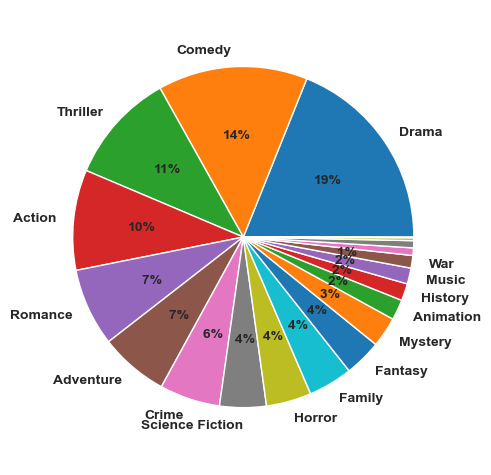

In [27]:
# See the percentage of films belonging to a genre

plt.rc('font', weight='bold')

# Set up the figure and axis
f, ax = plt.subplots(figsize=(5, 5))

# Calculate the count of films for each genre
genre_count = []
for genre in list_genres:
    genre_count.append([genre, df_reduced[genre].sum()])  # Calculate the sum of films for each genre

# Sort the genres based on the count in descending order
genre_count.sort(key=lambda x: x[1], reverse=True)

# Extract labels and sizes for the pie chart
labels, sizes = zip(*genre_count)

# Select only genres with a percentage greater than 1% for labeling
labels_selected = [label if size > sum(sizes) * 0.01 else '' for label, size in genre_count]

# Plot the pie chart
ax.pie(sizes, labels=labels_selected,
       autopct=lambda x: '{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


The graph below lists all the actors that appeared in more than 5 films (only taking into account the actor_name). The x-axis corresponds to the average of the film release years and the y-axis to the mean IMDB score. Every film is tagged according to its genre and hovering with the mouse, the actors names are displayed.

In [28]:
reduced_genre_list = labels[:12]
trace=[]
for genre in reduced_genre_list:
    trace.append({'type':'scatter',
                  'mode':'markers',
                  'y':most_prolific.loc[most_prolific['favored_genre']==genre,'vote_average'],
                  'x':most_prolific.loc[most_prolific['favored_genre']==genre,'title_year'],
                  'name':genre,
                  'text': most_prolific.loc[most_prolific['favored_genre']==genre,'actor_name'],
                  'marker':{'size':10,'opacity':0.7,
                            'line':{'width':1.25,'color':'black'}}})
layout={'title':'Actors favored genres',
        'xaxis':{'title':'mean year of activity'},
        'yaxis':{'title':'mean score'}}
fig=Figure(data=trace,layout=layout)
pyo.iplot(fig)

In [29]:
selection = df_appearance['title_year'] >= 10
most_prolific = df_actors[selection]
actors_list = most_prolific['actor_name'].unique()

Now, I begin to answer a question that intrigued me from the list of questions sir had provided:

1. Are there observable patterns in the network connecting actors?
(Here are I am only taking experienced and prolific actors with  

In [30]:
test = pd.crosstab(df['actor_1_name'], df['actor_2_name'])

edge = []
for actor_1, actor_2 in list(test[test > 0].stack().index):
    if actor_1 not in actors_list: continue
    if actor_2 not in actors_list: continue

    if actor_1 not in actors_list or actor_2 not in actors_list: continue
    if actor_1 != actor_2:
        edge.append([actor_1, actor_2])

num_of_adjacencies = [0 for _ in range(len(df_actors))]
for ind, col in df_actors.iterrows():
    actor = col['actor_name']
    nb = sum([1 for i,j in edge if (i == actor) or (j == actor)])
    num_of_adjacencies[ind] = nb

In [31]:
from plotly.graph_objs import Scatter, Data, Layout, Figure

def prep(edge, num_of_adjacencies, df, actors_list, actor_to_highlight):
    edge_trace = Scatter(
        x=[],
        y=[],
        line=dict(width=0.5, color='#888'),  # Adjusted line format
        hoverinfo='none',
        mode='lines')

    edge_trace_highlight = Scatter(
        x=[],
        y=[],
        line=dict(width=1, color='#FF0000'),  # Adjusted line format
        hoverinfo='none',
        mode='lines')

    for actor_1, actor_2 in edge:
        x0, y0 = df[df['actor_name'] == actor_1][['title_year', 'vote_average']].unstack()
        x1, y1 = df[df['actor_name'] == actor_2][['title_year', 'vote_average']].unstack()
        if actor_2 == actor_to_highlight or actor_1 == actor_to_highlight:
            edge_trace_highlight['x'] = list(edge_trace_highlight['x']) + [x0, x1, None]
            edge_trace_highlight['y'] = list(edge_trace_highlight['y']) + [y0, y1, None]
        else:
            edge_trace['x'] = list(edge_trace['x']) + [x0, x1, None]
            edge_trace['y'] = list(edge_trace['y']) + [y0, y1, None]

    node_trace = Scatter(
        x=[],
        y=[],
        text=[],
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='viridis',
            reversescale=True,
            color=[],  # Initialize color as a list
            size=10,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line=dict(width=2)))  # Updated Marker to scatter.Marker

    for ind, col in df.iterrows():
        if col['actor_name'] not in actors_list:
            continue
        node_trace['x'] = list(node_trace['x']) + [col['title_year']]
        node_trace['y'] = list(node_trace['y']) + [col['vote_average']]
        node_trace['text'] = list(node_trace['text']) + [col['actor_name']]  # Convert to list before appending
        # Highlight connections to the specified actor
        if col['actor_name'] == actor_to_highlight:
            node_trace['marker']['color'] = list(node_trace['marker']['color']) + ['red']
        else:
            node_trace['marker']['color'] = list(node_trace['marker']['color']) + [num_of_adjacencies[ind]]  # Convert to list before appending

    # Include both edge traces in the figure data
    fig1 = Figure(data=[edge_trace, edge_trace_highlight, node_trace],
                  layout=Layout(
                      title='<br>Connections between actors',
                      titlefont=dict(size=16),
                      showlegend=False,
                      hovermode='closest',
                      margin=dict(b=20, l=5, r=5, t=40),
                      annotations=[dict(
                          showarrow=False,
                          xref="paper", yref="paper",
                          x=0.005, y=-0.002)],
                      xaxis=dict(showgrid=True, zeroline=False, showticklabels=True),
                      yaxis=dict(showgrid=True, zeroline=False, showticklabels=True)))

    return fig1


In [32]:
fig = prep(edge, num_of_adjacencies, df_actors, actors_list, 'Ian McKellen')
pyo.iplot(fig)

 # Basic Recommendation System 
 Now as my final task, I hoped to make movie recommendations from the dataset, based on the input of a movie title. 

In [33]:
df = movies.merge(credits, on='title')
df = df[['movie_id', 'title','overview','keywords', 'genres', 'cast', 'crew']]
df.dropna(inplace=True)
df.iloc[0].genres

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [34]:
import ast

def names(lst):
    return [i['name'] for i in lst]

# Call function
df['genres'] = df['genres'].apply(names)

df.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                            keywords  \
0  [{'id': 1463, 'name': 'culture clash'}, {'id':...   
1  [{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...   
2  [{'id': 470, 'name': 'spy'}, {'id': 818, 'name...   
3  [{'id': 849, 'name': 'dc comics'}, {'id': 853,...   
4  [{'id': 818, 'name': 'based on novel'}, {'id':...   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   
2                     [Action, Adventure, Crime]   
3               [Action, Crime, Drama, Thriller]   
4           [Action, Adventure, Science Fiction]   

                                                cast  \
0  [{'cast_id': 242, 'character': 'Jake Sully', '...   
1  [{'cast_id': 4, 'character': 'Captain Jack Spa...   
2  [{'cast_id': 1, 'character': 'James Bond', 'cr...   
3  [{'cast_id': 2, 'character': 'Bruce Wayne / Ba...   
4  [{'cast_id': 5, 'character': 'John Carter', 'c...   

                                                crew  
0  [{'credit_id': '52fe48009251416c750aca23', 'de...  
1  [{'credit_id': '52fe4232c3a36847f800b579', 'de...  
2  [{'credit_id': '54805967c3a36829b5002c41', 'de...  
3  [{'credit_id': '52fe4781c3a36847f81398c3', 'de...  
4  [{'credit_id': '52fe479ac3a36847f813eaa3', 'de...

In [35]:
def top_three_actors(lst):
    return [i['name'] for i in lst][:3]

# Apply the function
df['cast'] = df['cast'].apply(top_three_actors)

In [36]:
# Convert the 'crew' column to a list of dictionaries
def fetch_directors(text):
    L = []
    # Ensure the input is a string
    text = str(text)
    for i in eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

# Apply the function
df['crew'] = df['crew'].apply(fetch_directors)

In [37]:
# Convert the 'keywords' column to a list of keywords
def collapse(L):
    L1 = []
    for i in L:
        if isinstance(i, dict):
            i = str(i)
        L1.append(i.replace(" ", ""))
    return L1

df['cast'] = df['cast'].apply(collapse)
df['crew'] = df['crew'].apply(collapse)
df['genres'] = df['genres'].apply(collapse)
df['keywords'] = df['keywords'].apply(collapse)

In [38]:
# Combine all the tags into a single column
df['overview'] = df['overview'].apply(lambda x: x.split() if isinstance(x, str) else [])

df['genres'] = df['genres'].apply(lambda x: [i.replace(" ", "") for i in x if pd.notna(i)] if isinstance(x, list) else [])
df['keywords'] = df['keywords'].apply(lambda x: [i.replace(" ", "") for i in x if pd.notna(i)] if isinstance(x, list) else [])
df['cast'] = df['cast'].apply(lambda x: [i.replace(" ", "") for i in x if pd.notna(i)] if isinstance(x, list) else [])
df['crew'] = df['crew'].apply(lambda x: [i.replace(" ", "") for i in x if pd.notna(i)] if isinstance(x, list) else [])
df['tags'] = df['overview']+df['genres']+df['keywords']+df['cast']+df['crew']

In [39]:
# Create a new DataFrame with only the required columns
df = df[['movie_id', 'title', 'tags']]

df['tags'] = df['tags'].apply(lambda x:" ".join(x))

df['tags'] = df['tags'].apply(lambda x:x.lower())

In [40]:
# creating the recommendation system

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a CountVectorizer object
cv = CountVectorizer()

# Fit and transform the data
count_matrix = cv.fit_transform(df['tags'])

# Compute the cosine similarity matrix based on the count_matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

# Create a Series with the movie titles as index
indices = pd.Series(df['title'])

# Function to recommend movies
def recommend(title, cosine_sim = cosine_sim):
    recommended_movies = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_movies.append(list(df['title'])[i])
        
    return recommended_movies

recommend('2012')

['Star Wars: Episode II - Attack of the Clones',
 'In the Heart of the Sea',
 'The Tree of Life',
 'Daylight',
 'Men in Black II',
 'How to Train Your Dragon 2',
 'Downfall',
 'Johnny English Reborn',
 'The Lord of the Rings: The Return of the King',
 'Summer Storm']

In [41]:
df

movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4804      9367                               El Mariachi   
4805     72766                                 Newlyweds   
4806    231617                 Signed, Sealed, Delivered   
4807    126186                          Shanghai Calling   
4808     25975                         My Date with Drew   

                                                   tags  
0     in the 22nd century, a paraplegic marine is di...  
1     captain barbossa, long believed to be dead, ha...  
2     a cryptic message from bond’s past sends him o...  
3     following the death of district attorney harve...  
4     john carter is a war-weary, former military ca...  
...                                                 ...  
4804  el mariachi just wants to play his guitar and ...  
4805  a newlywed couple's honeymoon is upended by th...  
4806  "signed, sealed, delivered" introduces a dedic...  
4807  when ambitious new york attorney sam is sent t...  
4808  ever since the second grade when he first saw ...  

[4806 rows x 3 columns]

In [42]:
# Use the TF-IDF Vectorizer to convert text data into a matrix of TF-IDF features to give more weight to unique words

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tfidf = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = tfidf.fit_transform(df['tags'])

# Compute the cosine similarity matrix based on the tfidf_matrix
cosine_sim_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to recommend movies using TF-IDF
def recommend_tfidf(title, cosine_sim = cosine_sim_tfidf):
    recommended_movies = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_movies.append(list(df['title'])[i])
        
    return recommended_movies

recommend_tfidf('2012')

['Southland Tales',
 "Brooklyn's Finest",
 'The Day After Tomorrow',
 'The Fifth Element',
 'Deep Impact',
 "Dante's Peak",
 'Everyone Says I Love You',
 'Cloverfield',
 'Pompeii',
 'The Matrix Revolutions']

In [43]:
# Compare the recommendations from the CountVectorizer and TF-IDF Vectorizer methods

print("Recommendations using CountVectorizer:")
print(recommend('The Matrix'))

print("\nRecommendations using TF-IDF Vectorizer:")
print(recommend_tfidf('The Matrix'))

Recommendations using CountVectorizer:
['The Matrix Revolutions', "Brooklyn's Finest", 'Interstellar', 'Southland Tales', 'Zero Dark Thirty', 'Mad Max 2: The Road Warrior', 'Straight Outta Compton', 'The Day After Tomorrow', 'Metropolis', 'The Runaways']

Recommendations using TF-IDF Vectorizer:
['The Matrix Revolutions', 'The Matrix Reloaded', "Brooklyn's Finest", 'Southland Tales', 'Everyone Says I Love You', 'Interstellar', 'Dune', 'A Scanner Darkly', 'Straight Outta Compton', 'Hackers']


# Conclusion

In this notebook, I have explored the Movie Metadata dataset, which contains information about movies, characters, IMDb ratings, and Oscar nominations. I performed exploratory data analysis, created visualizations, and answered questions about the data. I also used the TMDB 5000 Movie Dataset to analyze the favorite genres of actors, observe patterns in the network connecting actors, and create a basic movie recommendation system based on movie titles.

I used various data manipulation techniques, such as extracting information from JSON columns, handling missing values, and creating new columns. I also created visualizations using libraries like Matplotlib and Plotly to gain insights from the data.

Overall, this notebook demonstrates how to analyze movie-related datasets, explore relationships between different variables, and create interactive visualizations to present the findings. The movie recommendation system provides a practical example of how data analysis can be used to make personalized recommendations based on user input.

Thank you for reading! I hope you found this notebook informative and engaging. 

Dhruv Srivastava (u2020033)